[![logo](https://climate.copernicus.eu/sites/default/files/custom-uploads/branding/LogoLine_horizon_CAMS.png)](https://atmosphere.copernicus.eu)

# Data processing of ACTRIS In-Situ NOx, NO2 and NO data

**Run the tutorial via free cloud platforms**: [![binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ecmwf-training/cams-act6/main?labpath=02-in-situ/26_ACTRIS_in-situ_NOx.ipynb)
[![kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-training/cams-act6/blob/main/02-in-situ/26_ACTRIS_in-situ_NOx.ipynb)
[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-training/cams-act6/blob/main/02-in-situ/26_ACTRIS_in-situ_NOx.ipynb)


## Learning objectives

Participants can expect to achieve the following with this notebook:

- Gain an understanding of data processing and analysis techniques for ACTRIS In-Situ NOx, NO2, and NO data.
- Understand how to inspect and manipulate xarray DataArrays.
- Gain insights into data visualization using matplotlib.
- Learn how to calculate monthly averages and plot climatology of nitrogen oxides.

## Initial setup

Before we begin we must prepare our environment. This includes importing the various Python libraries that we will need.

### Import libraries

In [30]:
# Libraries for working with multidimensional arrays
import xarray as xr
import pandas as pd

# Libraries for plotting and visualising data
import matplotlib.pyplot as plt


# Libaries for working with API and json data
import json

## Inspect data

In this example the data is selected by searching in the [ACTRIS Data Portal](https://data.actris.eu). A basket (.json) file of **Nitrogen oxides** at  **Hyttiälä** is stored in *static*. A more thorugh example of this process is shown in file "23_search_ACTRIS_data_portal_OC_EC.ipynb".

### Open and load basket.json file

In [3]:
f = open('static/basket_NOx_Hyytiala.json') # open the file "basket_NOx_Hyytiala.json", data found by using the ACTRIS Data Portal
md = json.load(f) # load the json file

### Inspect data

Start by inspecting the metadata of the first element in out basket file and opening the dataset using xarray. This notebook uses the OpenDAP protocol for streaming of data, but by using the *downloadURL* you have the possibility to download the data on your computer as well. This basket contains datasets of **Nitrogen oxides at Hyttiälä**. Each dataset has a PID (Persistant identifier), which includes a landing page with information about the dataset and instructions on citation and acknowledgements for using the data.

Documentation on in-situ file formats can be found here: https://ebas.pages.nilu.no/ebas-io/fileformat_netcdf/index.html 

In [4]:
first_element = next(iter(md)) # get the key to the first element of the dictionary
md[first_element] # get the metadata of the first element of the dictionary

{'id': 226094,
 'title': 'Nitrogen oxides at Hyytiälä',
 'matrix': 'gas phase',
 'instrumentType': 'chemiluminescence detector, photolytical converter',
 'station': 'Hyytiälä',
 'startTime': '2015-12-31T23:00:00.0000000Z',
 'endTime': '2017-12-31T23:00:00.0000000Z',
 'downloadUrl': 'https://thredds.nilu.no/thredds/fileServer/ebas_doi/8K/NS/UU/8KNS-UUNJ.nc',
 'opendapUrl': 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/8K/NS/UU/8KNS-UUNJ.nc',
 'variables': ['nitric oxide mass concentration',
  'nitrogen dioxide mass concentration',
  'nitrogen oxides mass concentration'],
 'pid': 'https://doi.org/10.48597/8KNS-UUNJ',
 'repository': 'IN-SITU'}

In [5]:
ds = xr.open_dataset(md[first_element]['opendapUrl'])
ds

<xarray.Dataset>
Dimensions:                                                (time: 17544,
                                                            tbnds: 2,
                                                            metadata_time: 2,
                                                            NOx_nmol_per_mol_amean_qc_flags: 1,
                                                            NOx_ug_N_per_m3_amean_qc_flags: 1,
                                                            NOx_nmol_per_mol_ExpUnc2s_qc_flags: 1,
                                                            ...
                                                            nitrogen_monoxide_nmol_per_mol_perc8413_qc_flags: 1,
                                                            nitrogen_monoxide_ug_N_per_m3_perc8413_qc_flags: 1,
                                                            nitrogen_monoxide_nmol_per_mol_precision_qc_flags: 1,
                                                            nitrogen_monoxide_ug_N_per_m3_precision_qc_flags: 1,
                                                            nitrogen_monoxide_nmol_per_mol_stddev_qc_flags: 1,
                                                            nitrogen_monoxide_ug_N_per_m3_stddev_qc_flags: 1)
Coordinates:
  * time                                                   (time) datetime64[ns] ...
  * metadata_time                                          (metadata_time) datetime64[ns] ...
Dimensions without coordinates: tbnds, NOx_nmol_per_mol_amean_qc_flags,
                                NOx_ug_N_per_m3_amean_qc_flags,
                                NOx_nmol_per_mol_ExpUnc2s_qc_flags,
                                NOx_ug_N_per_m3_ExpUnc2s_qc_flags,
                                NOx_nmol_per_mol_prec1587_qc_flags,
                                NOx_ug_N_per_m3_prec1587_qc_flags,
                                ...
                                nitrogen_monoxide_nmol_per_mol_perc8413_qc_flags,
                                nitrogen_monoxide_ug_N_per_m3_perc8413_qc_flags,
                                nitrogen_monoxide_nmol_per_mol_precision_qc_flags,
                                nitrogen_monoxide_ug_N_per_m3_precision_qc_flags,
                                nitrogen_monoxide_nmol_per_mol_stddev_qc_flags,
                                nitrogen_monoxide_ug_N_per_m3_stddev_qc_flags
Data variables: (12/110)
    time_bnds                                              (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                     (metadata_time, tbnds) datetime64[ns] ...
    NOx_nmol_per_mol_amean                                 (time) float64 ...
    NOx_nmol_per_mol_amean_qc                              (NOx_nmol_per_mol_amean_qc_flags, time) float64 ...
    NOx_nmol_per_mol_amean_ebasmetadata                    (metadata_time) |S64 ...
    NOx_ug_N_per_m3_amean                                  (time) float64 ...
    ...                                                     ...
    nitrogen_monoxide_nmol_per_mol_stddev                  (time) float64 ...
    nitrogen_monoxide_nmol_per_mol_stddev_qc               (nitrogen_monoxide_nmol_per_mol_stddev_qc_flags, time) float64 ...
    nitrogen_monoxide_nmol_per_mol_stddev_ebasmetadata     (metadata_time) |S64 ...
    nitrogen_monoxide_ug_N_per_m3_stddev                   (time) float64 ...
    nitrogen_monoxide_ug_N_per_m3_stddev_qc                (nitrogen_monoxide_ug_N_per_m3_stddev_qc_flags, time) float64 ...
    nitrogen_monoxide_ug_N_per_m3_stddev_ebasmetadata      (metadata_time) |S64 ...
Attributes: (12/108)
    Conventions:                                   CF-1.8, ACDD-1.3
    featureType:                                   timeSeries
    title:                                         Nitrogen oxides at Hyytiälä
    keywords:                                      mole_fraction_of_nitrogen_...
    id:                                            8KNS-UUNJ.nc
    naming_authority:           

## Data processing

Here the two datasets are merged together (using xarray concat) to have one continuous long time series. 

As the variable name might change slightly between datasets, we can use the attributes to identify the variable we are interested in, see https://ebas.pages.nilu.no/ebas-io/fileformat_netcdf/variables.html for more information.

In [6]:
ds_nox_list = []
ds_no2_list = []
ds_no_list = []

for i in md:  # Iterate over the keys in the 'md' dictionary
    ds = xr.open_dataset(md[i]['opendapUrl'])  # Open the dataset using the 'opendapUrl' from the metadata
    
    for v in list(ds.data_vars.keys()):  # Iterate over the variables in the dataset
        attrs = ds[v].attrs  # Get the attributes of the variable
        if attrs.get('ebas_statistics') == 'arithmetic mean' and attrs.get('units')=='ug/m3':  # Choose if you want to look at nitrogen oxides in 'ug/m3' or 'nmol/mol'
            std_name = attrs.get('standard_name')
            if 'nox' in std_name: 
                ds_nox_list.append(ds[v])
            if 'nitrogen_dioxide' in std_name: 
                ds_no2_list.append(ds[v])
            if 'nitrogen_monoxide' in std_name: 
                ds_no_list.append(ds[v])


In [7]:
# Concatenate the list of DataArrays in ds_no along the 'time' dimension
no_ds = xr.concat([ds for ds in ds_no_list], dim='time')

# Concatenate the list of DataArrays in ds_no2 along the 'time' dimension
no2_ds = xr.concat([ds for ds in ds_no2_list], dim='time')

# Concatenate the list of DataArrays in ds_nox along the 'time' dimension
nox_ds = xr.concat([ds for ds in ds_nox_list], dim='time')

## Data visualisation

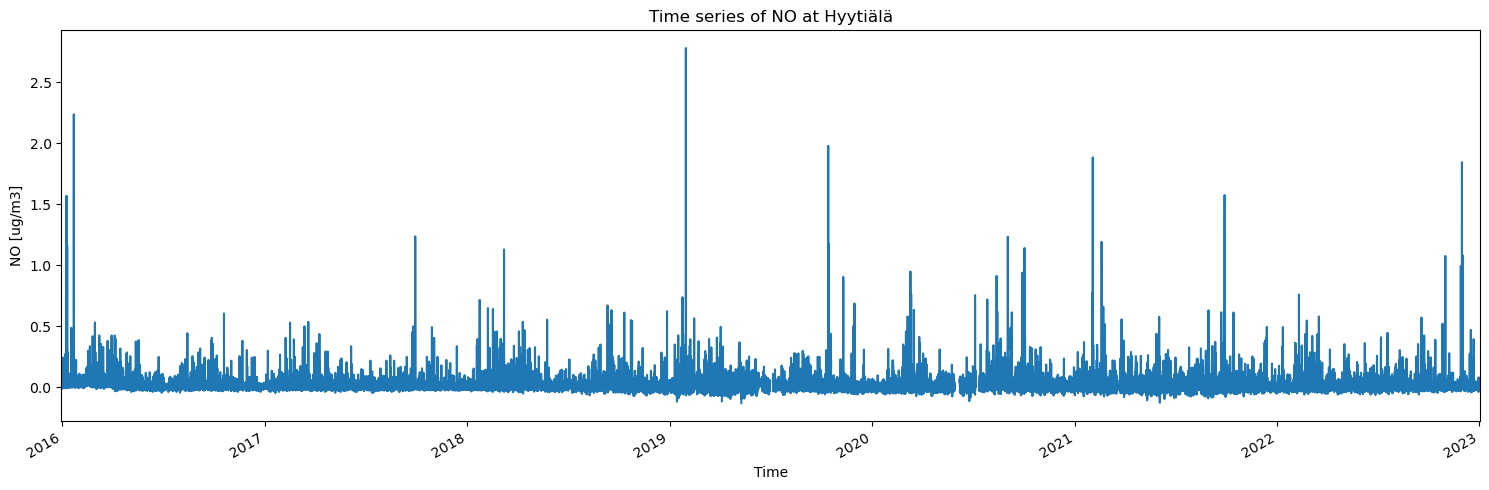

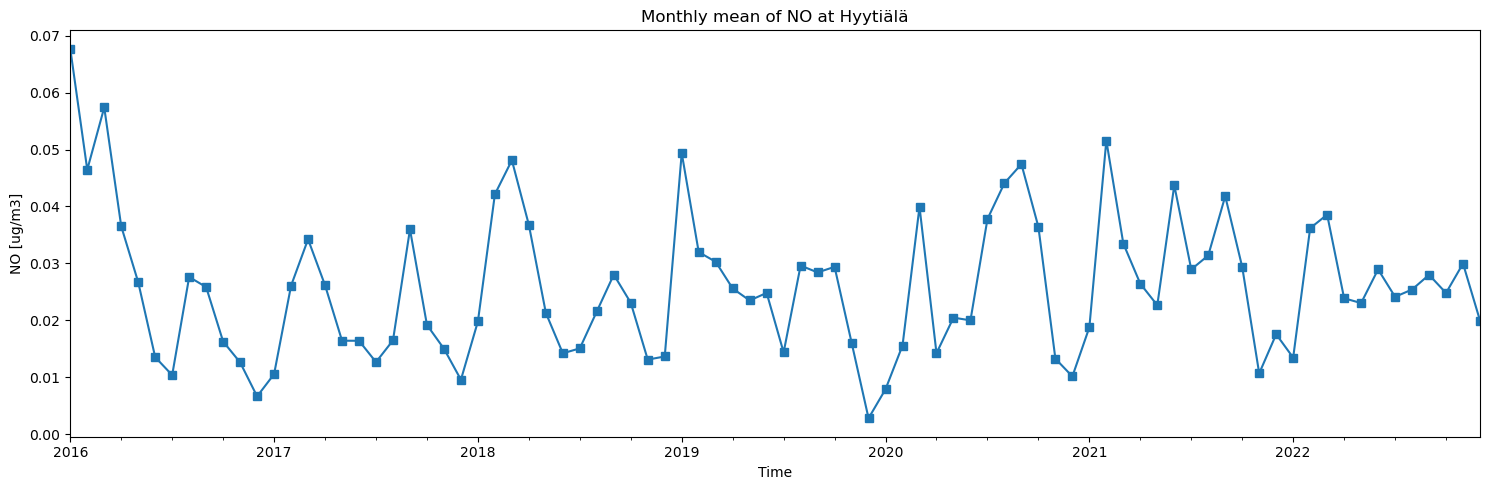

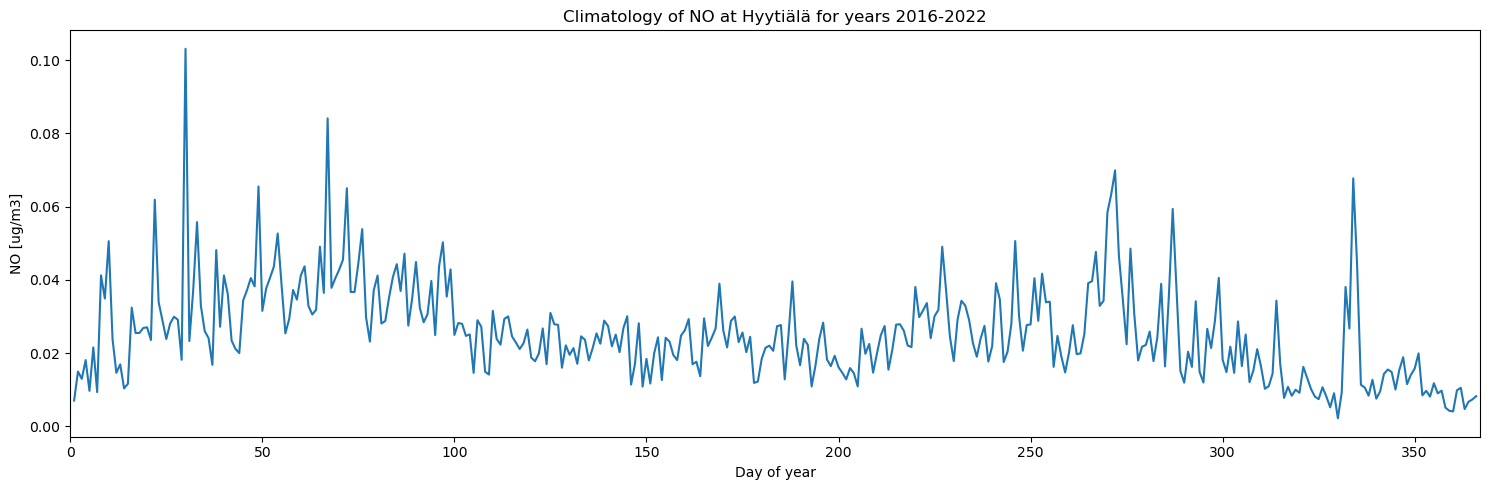

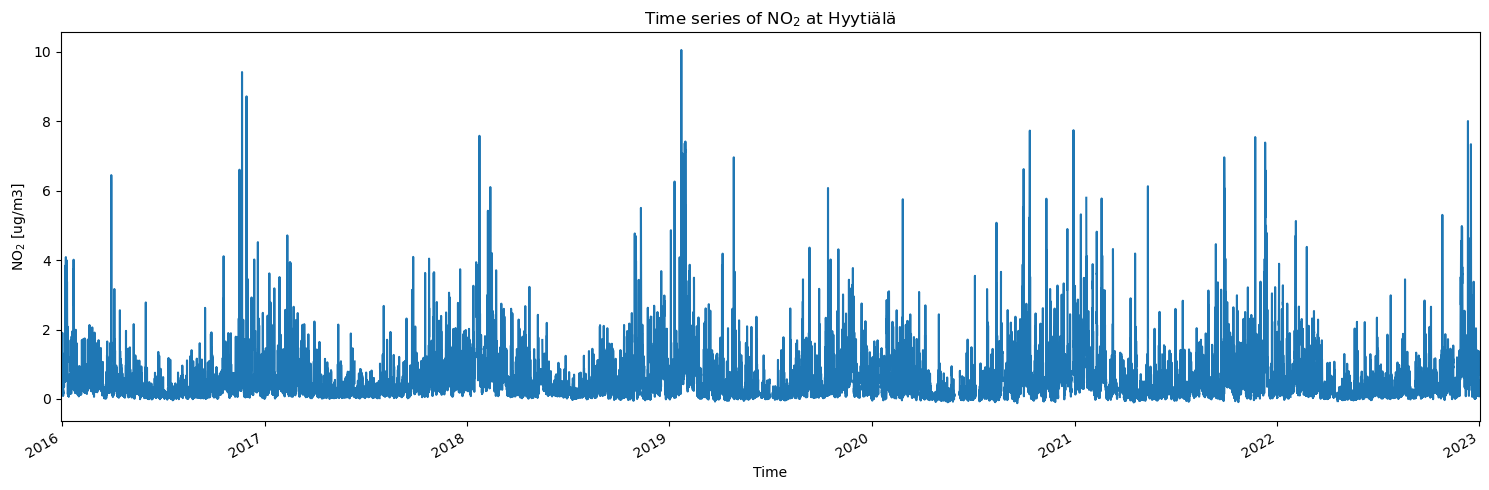

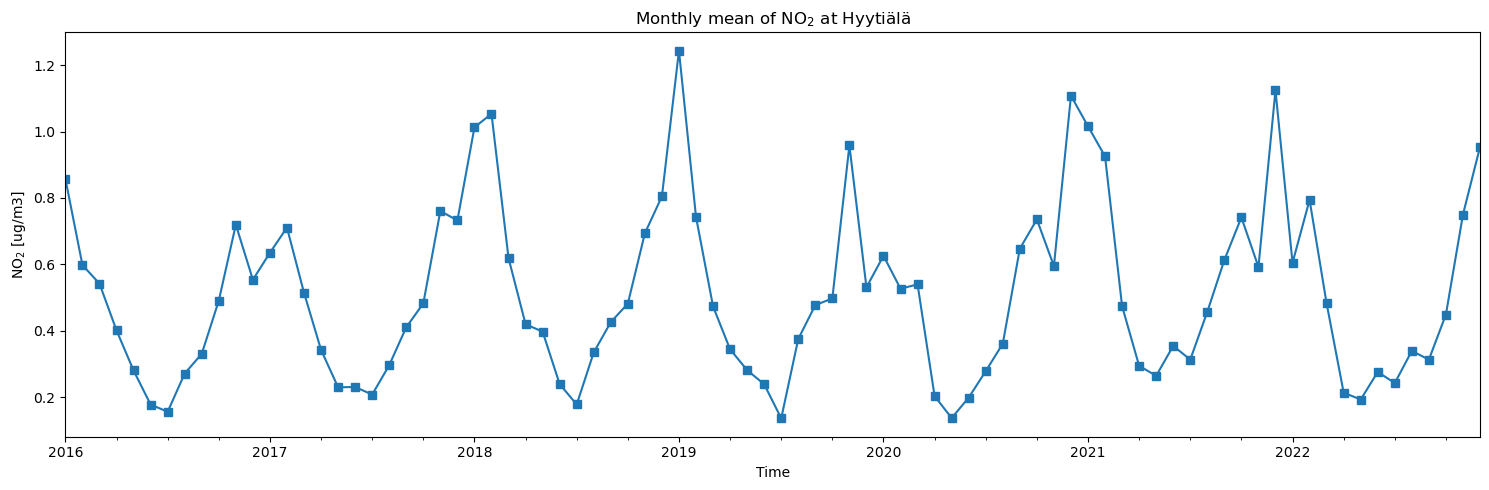

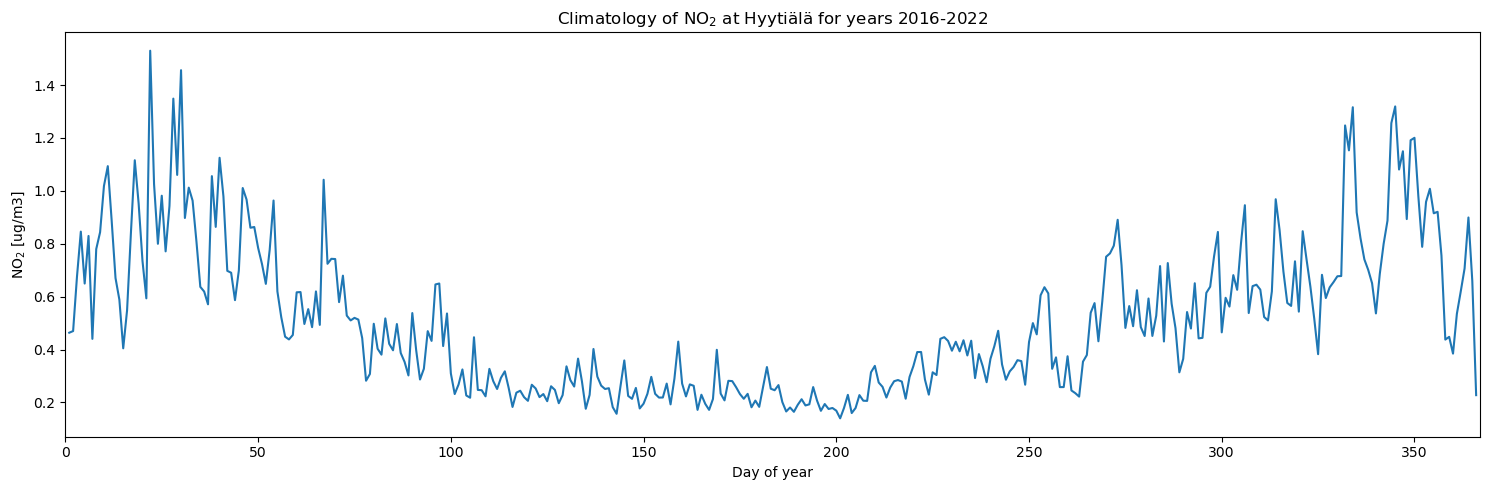

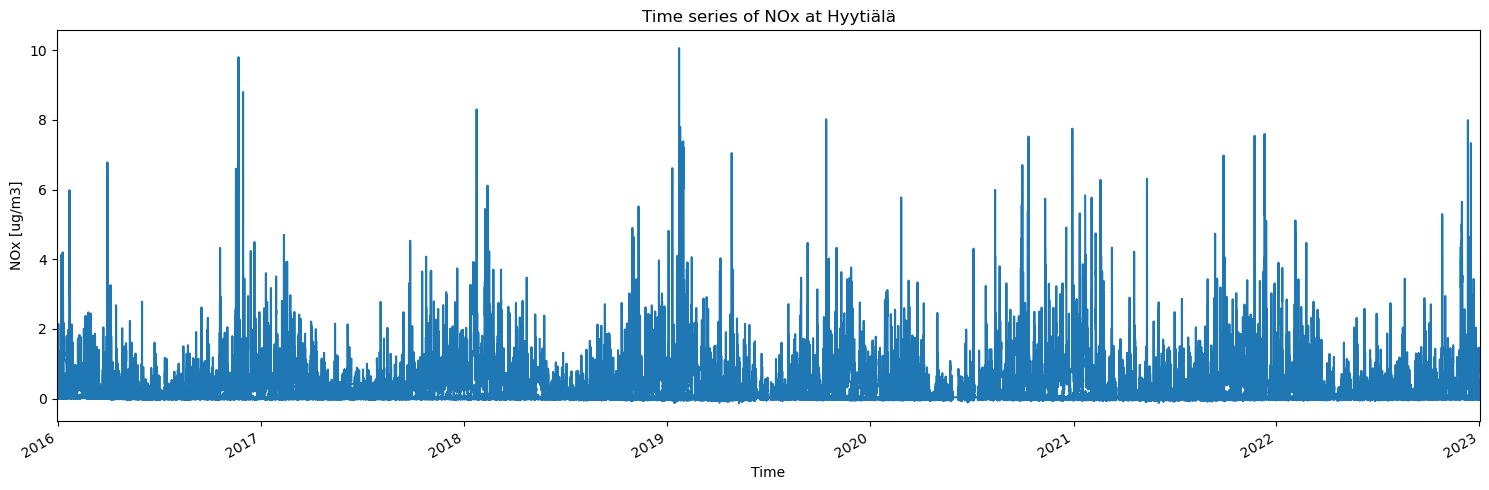

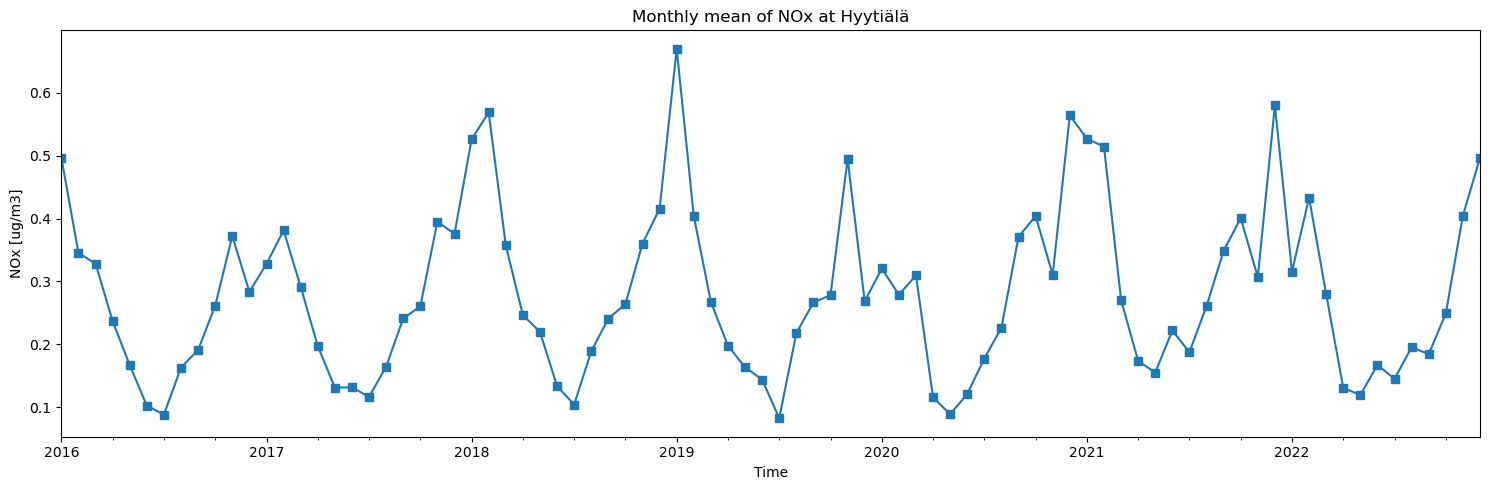

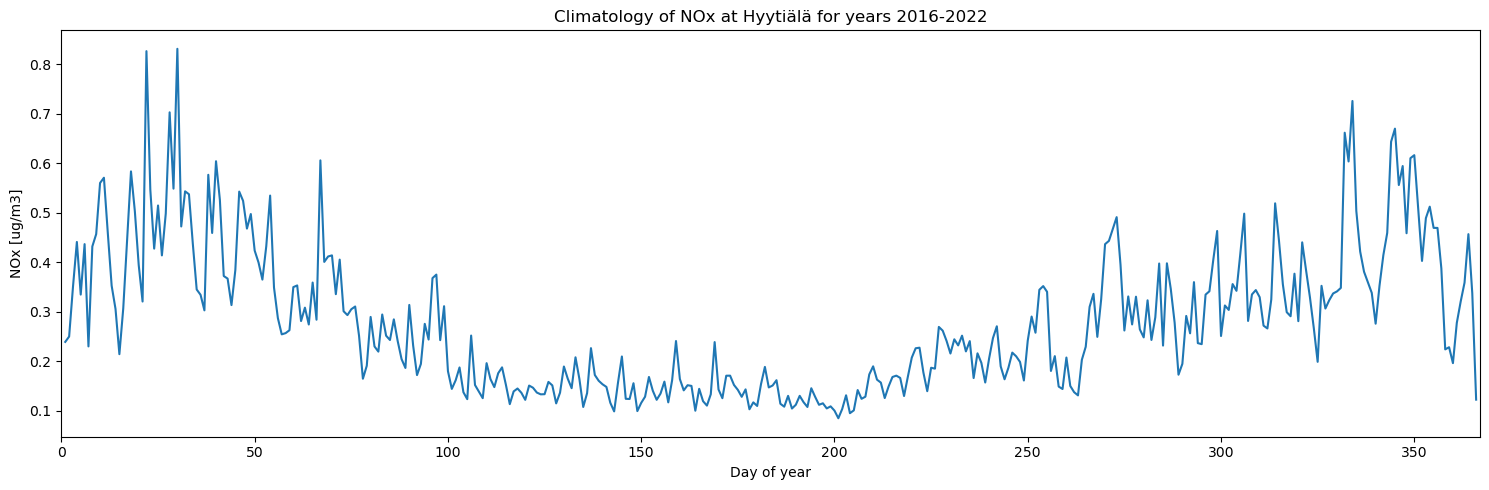

In [50]:
def rename_title(component): 
    """Function to rename the title of the component"""
    if component == 'nox': 
        return 'NOx'
    if component == 'nitrogen_dioxide':
        return 'NO$_2$'
    if component == 'nitrogen_monoxide':
        return 'NO'
    else: 
        return component

def year_month(xray_obj):
    """
    Given an xarray object with a 'time' coordinate, return a DataArray
    with values representing the first date of the month for each time.
    """
    time = xray_obj.coords['time']
    values = time.to_index().to_period('M').to_timestamp()
    return xr.DataArray(values, [time], name='year_month')

nitrogen_oxides = [no_ds, no2_ds, nox_ds] # datasets for nitrogen oxides

for ds in nitrogen_oxides: 
    # Plot the original data
    plt.figure(figsize=(15, 5))
    ds.plot()
    plt.title('Time series of {} at {}'.format(rename_title(ds.ebas_component),ds.ebas_station_name))
    plt.ylabel('{} [{}]'.format(rename_title(ds.ebas_component),ds.units))
    plt.xlabel('Time')
    plt.xlim(ds.time[0] - pd.Timedelta(days=1), ds.time[-1] + pd.Timedelta(days=1))  # Set the x-axis limits
    plt.tight_layout()
    plt.show()

    # Calculate and plot the monthly average
    monthly_avg = ds.groupby(year_month(ds)).mean()
    monthly_avg.to_dataframe().plot(style='s-', figsize=(15, 5))
    #print(monthly_avg)
    plt.title('Monthly mean of {} at {}'.format(rename_title(ds.ebas_component),ds.ebas_station_name))
    plt.ylabel('{} [{}]'.format(rename_title(ds.ebas_component),ds.units))
    plt.xlabel('Time')
    plt.legend().remove()
    #plt.xlim(monthly_avg.index[0] - pd.Timedelta(days=1), monthly_avg.time[-1] + pd.Timedelta(days=1))  # Set the x-axis limits
    plt.tight_layout()
    plt.show()

    # Plot the climatology
    ds.groupby('time.dayofyear').mean().plot(figsize=(15, 5))
    plt.title('Climatology of {} at {} for years {}-{}'.format(rename_title(ds.ebas_component),ds.ebas_station_name, ds.time.dt.year.min().values.tolist(), ds.time.dt.year.max().values.tolist()))
    plt.xlabel('Day of year')
    plt.ylabel('{} [{}]'.format(rename_title(ds.ebas_component),ds.units))
    plt.xlim(0, 367)  # Set the x-axis limits
    plt.tight_layout()
    plt.show()

## Take home messages

The key take-home messages from this Jupyter Notebook are as follows:

1. The notebook focuses on data processing and analysis techniques for ACTRIS In-Situ NOx, NO2, and NO data.
2. It demonstrates how to inspect and manipulate xarray DataArrays, which are multidimensional arrays used for working with scientific data.
3. The notebook provides insights into data visualization using matplotlib, a popular plotting library in Python.
4. It covers techniques for calculating and plotting monthly averages and climatology of nitrogen oxides.

